<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2022</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Tuesday, April 28 • 17:00 - 19:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://app.slack.com/client/T094HBB9T/C039C3J7Y1M">#t22-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.youtube.com/playlist?list=PLgLft9vxdduDFkG9gtuNicNmb2YUzWqSQ">https://www.youtube.com/playlist?list=PLgLft9vxdduDFkG9gtuNicNmb2YUzWqSQ</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

# Previous pyGIMLi tutorial (Transform 2021, 5000+ views)
* Introduction to pyGIMLi with some slides, installation
* Basic mesh building (geometry, triangulation, 3D meshes)
* Modelling the heat equation with finite elements
* Synthetic simulation and inversion of crosshole traveltime data
* Inverting ERT field data using the manager
* Incorporating a third-party forward solver (`empymod`)

## Objectives of this tutorial
* Dive more into the main pg classes `Mesh`, `DataContainer`, matrix types
* Demonstrate different kinds of constraints
* Regionalize constraints on subsurface
* Incorporate prior knownledge into inversion

In [1]:
# Just some plotting settings
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook

In [2]:
# the typical import
import numpy as np
import pygimli as pg

## The DataContainer class

Assume we want to store Vertical Electrical Sounding (VES) data.

In [3]:
# We define logarithmically equidistant AB/2 spacings
ab2 = np.logspace(0, 3, 31)
print(ab2)

[   1.            1.25892541    1.58489319    1.99526231    2.51188643
    3.16227766    3.98107171    5.01187234    6.30957344    7.94328235
   10.           12.58925412   15.84893192   19.95262315   25.11886432
   31.6227766    39.81071706   50.11872336   63.09573445   79.43282347
  100.          125.89254118  158.48931925  199.5262315   251.18864315
  316.22776602  398.10717055  501.18723363  630.95734448  794.32823472
 1000.        ]


In [4]:
# we create an empty data container
ves = pg.DataContainer()
print(ves)

Data: Sensors: 0 data: 0, nonzero entries: []


In [5]:
ves.resize(len(ab2))
print(ves)

Data: Sensors: 0 data: 31, nonzero entries: []


In [6]:
ves["ab2"] = ab2
ves["mn2"] = ab2 / 3
print(ves)

Data: Sensors: 0 data: 31, nonzero entries: ['ab2', 'mn2']


We now want to do a VES simulation

In [7]:
mgr = pg.physics.ert.VESManager()

24/04/22 - 15:32:05 - pyGIMLi - WARNING - setDeltaChiStop had been renamed to setDeltaPhiStop and will be removed in: 


In [8]:
model = [10, 10, 100, 10, 1000]
ves["rhoa"] = mgr.simulate(model, ves["ab2"], ves["mn2"])
print(ves)

Data: Sensors: 0 data: 31, nonzero entries: ['ab2', 'mn2', 'rhoa']


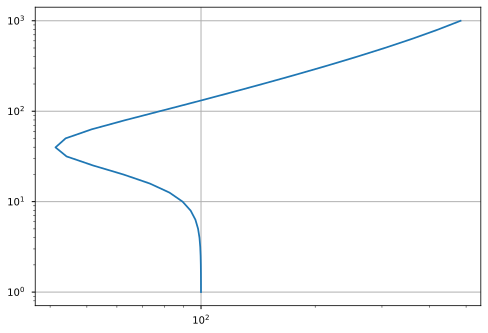

In [9]:
plt.loglog(ves["rhoa"], ves["ab2"], "x-");
plt.grid(True)

In [10]:
ves.save("ves.data")

1

In [11]:
ves["flag"] = pg.Vector(ves["rhoa"] > 100) + 1
ves.save("ves.data")  # , "ab2 mn2 rhoa")

1

In [12]:
print(ves)

Data: Sensors: 0 data: 31, nonzero entries: ['ab2', 'flag', 'mn2', 'rhoa']


In [13]:
ves["flag"]

31 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [14]:
ves.markValid(ves["ab2"] > 2)
ves.save("ves.data", "ab2 rhoa")  # note that only valid data are saved!
print(ves)

Data: Sensors: 0 data: 31, nonzero entries: ['ab2', 'flag', 'mn2', 'rhoa', 'valid']


## Data containers with indexed data 

In [67]:
# Assume we have a Transmitter, receiver and a property U
data = pg.DataContainer()
data.registerSensorIndex("Tx")
data.registerSensorIndex("Rx")
print(data)

Data: Sensors: 0 data: 0, nonzero entries: ['Rx', 'Tx']


In [16]:
# Create a list of 10 sensors, 2m spacing
for x in np.arange(10):
    data.createSensor([x*2, 0])
print(data)

Data: Sensors: 10 data: 0, nonzero entries: ['Rx', 'Tx']


In [17]:
data["Rx"] = np.arange(10)
# data["Tx"] = np.arange(9) # well catched
# data["Tx"] = np.arange(11) # extended: isn't this dangerous?
data["Tx"] = pg.Vector(data.size())
print(data)

Data: Sensors: 10 data: 10, nonzero entries: ['Rx', 'Tx']


In [18]:
sx = pg.x(data)
data["dist"] = sx[data["Rx"]] - sx[data["Tx"]]
print(data["dist"])

10 [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]


In [19]:
# use only data where transmitter is not receiver
data.markValid(data["Rx"] != data["Tx"])
print(data)

Data: Sensors: 10 data: 10, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


In [20]:
data.save("TxRx.data")

1

In [21]:
data.removeInvalid()
print(data)

Data: Sensors: 10 data: 9, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


In [22]:
data.createSensor(data.sensors()[-1])  # +0.1
print(data)

Data: Sensors: 10 data: 9, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


In [23]:
data.remove(data["dist"] > 14)
print(data)

Data: Sensors: 10 data: 7, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


In [24]:
data["dist"]

7 [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0]

In [25]:
data.scale([2, 1])
data.translate([10, 0])
data.save("TxRx.data")

1

In [26]:
data["Rx"][5] = data["Rx"][4]

In [27]:
data.removeUnusedSensors()
print(data)

Data: Sensors: 8 data: 7, nonzero entries: ['Rx', 'Tx', 'dist', 'valid']


In [28]:
data.removeSensorIdx(2)
print(data)

Data: Sensors: 0 data: 0, nonzero entries: ['Rx', 'Tx']


## The mesh class

In [61]:
mesh = pg.Mesh()
n11 = mesh.createNode((0.0, 0.0))
n12 = mesh.createNode((1.0, 0.0))
n13 = mesh.createNode((2.0, 0.0))
n21 = mesh.createNode((0.0, 1.0))
n22 = mesh.createNode((1.0, 1.0))
n23 = mesh.createNode((2.0, 1.0))
n31 = mesh.createNode((0.5, 1.7))
n32 = mesh.createNode((1.5, 1.7))
# n4 = mesh.createNode((1.0, -2.4))
mesh.createQuadrangle(n11, n12, n22, n21)
mesh.createQuadrangle(n12, n13, n23, n22)
mesh.createTriangle(n21, n22, n31)  
mesh.createTriangle(n22, n23, n32)  
mesh.createTriangle(n31, n32, n22)  # leave out
# mesh.createTriangle(n31, n32, n4)  
print(mesh)

Mesh: Nodes: 8 Cells: 5 Boundaries: 0


In [62]:
mesh.createNeighborInfos()
print(mesh)

Mesh: Nodes: 8 Cells: 5 Boundaries: 12


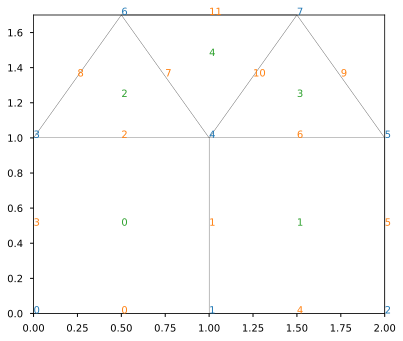

In [63]:
ax, _ = pg.show(mesh, showMesh=True)
for n in mesh.nodes(): 
    ax.text(n.x(), n.y(), str(n.id()), color="C0")
for b in mesh.boundaries(): 
    ax.text(b.center().x(), b.center().y(), str(b.id()), color="C1")
for c in mesh.cells(): 
    ax.text(c.center().x(), c.center().y(), str(c.id()), color="C2")    

In [64]:
for n in mesh.nodes():
    print(n.id(), n.pos())

0 RVector3: (0.0, 0.0, 0.0)
1 RVector3: (1.0, 0.0, 0.0)
2 RVector3: (2.0, 0.0, 0.0)
3 RVector3: (0.0, 1.0, 0.0)
4 RVector3: (1.0, 1.0, 0.0)
5 RVector3: (2.0, 1.0, 0.0)
6 RVector3: (0.5, 1.7, 0.0)
7 RVector3: (1.5, 1.7, 0.0)


In [65]:
for c in mesh.cells():
    print(c.id(), len(c.nodes()), c.center())

0 4 RVector3: (0.5, 0.5, 0.0)
1 4 RVector3: (1.5, 0.5, 0.0)
2 3 RVector3: (0.5, 1.2333333333333334, 0.0)
3 3 RVector3: (1.5, 1.2333333333333334, 0.0)
4 3 RVector3: (1.0, 1.4666666666666668, 0.0)


In [66]:
for b in mesh.boundaries():
    print(b.id(), ": Nodes:", b.ids(), end=" ")
    if not b.outside():
        left = b.leftCell()
        right = b.rightCell()
        print(left.id(), right.id())
    print()

0 : Nodes: 2 [0, 1] 
1 : Nodes: 2 [1, 4] 0 1

2 : Nodes: 2 [4, 3] 0 2

3 : Nodes: 2 [3, 0] 
4 : Nodes: 2 [1, 2] 
5 : Nodes: 2 [2, 5] 
6 : Nodes: 2 [5, 4] 1 3

7 : Nodes: 2 [4, 6] 2 4

8 : Nodes: 2 [6, 3] 
9 : Nodes: 2 [5, 7] 
10 : Nodes: 2 [7, 4] 3 4

11 : Nodes: 2 [6, 7] 
